In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding he cities
cities = []

# Identify the nearest city for each lat long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add to list
    if city not in cities:
        cities.append(city)
        
# Print city count to confirm sufficient count
len(cities)

630

In [6]:
# Import requests library
import requests

# Import api_key
from config import weather_api_key as api_key

# Import the datetime module from the datetime library
from datetime import datetime

# Build base url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | rikitea
Processing record 2 of Set 1 | cabo san lucas
Processing record 3 of Set 1 | khasan
Processing record 4 of Set 1 | chokurdakh
Processing record 5 of Set 1 | busselton
Processing record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing record 7 of Set 1 | anadyr
Processing record 8 of Set 1 | karkaralinsk
City not found. Skipping...
Processing record 9 of Set 1 | katsuura
Processing record 10 of Set 1 | codrington
Processing record 11 of Set 1 | batemans bay
Processing record 12 of Set 1 | yellowknife
Processing record 13 of Set 1 | gamboula
Processing record 14 of Set 1 | punta arenas
Processing record 15 of Set 1 | praya
Processing record 16 of Set 1 | port elizabeth
Processing record 17 of Set 1 | barinitas
Processing record 18 of Set 1 | vaini
Processing record 19 of Set 1 | tasiilaq
Processing record 20 of Set 1 | mastung
Processing record 21 of Set 1 | kamens

Processing record 37 of Set 4 | bonthe
Processing record 38 of Set 4 | nakhon thai
Processing record 39 of Set 4 | longyearbyen
Processing record 40 of Set 4 | beloha
Processing record 41 of Set 4 | hiranagar
Processing record 42 of Set 4 | upata
Processing record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing record 44 of Set 4 | hilo
Processing record 45 of Set 4 | bengkulu
Processing record 46 of Set 4 | chapais
Processing record 47 of Set 4 | pombas
Processing record 48 of Set 4 | altamira
Processing record 49 of Set 4 | belaya gora
Processing record 50 of Set 4 | barentsburg
City not found. Skipping...
Processing record 1 of Set 5 | plettenberg bay
Processing record 2 of Set 5 | tungor
Processing record 3 of Set 5 | santa marta
Processing record 4 of Set 5 | saryshagan
City not found. Skipping...
Processing record 5 of Set 5 | port blair
Processing record 6 of Set 5 | dingle
Processing record 7 of Set 5 | natal
Processing record 8 of Set 5 | victoria
Processing r

Processing record 25 of Set 8 | howard springs
Processing record 26 of Set 8 | dolinsk
Processing record 27 of Set 8 | lompoc
Processing record 28 of Set 8 | almaznyy
Processing record 29 of Set 8 | bulungu
Processing record 30 of Set 8 | longjiang
Processing record 31 of Set 8 | guane
Processing record 32 of Set 8 | xiongzhou
Processing record 33 of Set 8 | tahe
Processing record 34 of Set 8 | matagami
Processing record 35 of Set 8 | lufilufi
Processing record 36 of Set 8 | sarti
Processing record 37 of Set 8 | tabukiniberu
City not found. Skipping...
Processing record 38 of Set 8 | tsiroanomandidy
Processing record 39 of Set 8 | morro bay
Processing record 40 of Set 8 | cockburn town
Processing record 41 of Set 8 | colac
Processing record 42 of Set 8 | maxixe
Processing record 43 of Set 8 | ucluelet
Processing record 44 of Set 8 | gurskoye
City not found. Skipping...
Processing record 45 of Set 8 | lebu
Processing record 46 of Set 8 | meylan
Processing record 47 of Set 8 | grenaa
Pro

Processing record 13 of Set 12 | anori
Processing record 14 of Set 12 | luderitz
Processing record 15 of Set 12 | tabiauea
City not found. Skipping...
Processing record 16 of Set 12 | staryy nadym
Processing record 17 of Set 12 | marica
Processing record 18 of Set 12 | bafia
Processing record 19 of Set 12 | boundiali
Processing record 20 of Set 12 | taybad
Processing record 21 of Set 12 | hammonton
Processing record 22 of Set 12 | gambela
Processing record 23 of Set 12 | marystown
Processing record 24 of Set 12 | ganzhou
Processing record 25 of Set 12 | bargal
City not found. Skipping...
Processing record 26 of Set 12 | lolua
City not found. Skipping...
Processing record 27 of Set 12 | teguldet
Processing record 28 of Set 12 | lasa
Processing record 29 of Set 12 | bitung
Processing record 30 of Set 12 | ouallam
Processing record 31 of Set 12 | teahupoo
Processing record 32 of Set 12 | fare
Processing record 33 of Set 12 | hamilton
Processing record 34 of Set 12 | kaitangata
Processing 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.34,70,100,12.06,PF,2021-04-16 17:39:29
1,Cabo San Lucas,22.8909,-109.9124,86.00,34,20,6.91,MX,2021-04-16 17:39:09
2,Khasan,42.4308,130.6434,43.39,73,99,6.04,RU,2021-04-16 17:39:29
3,Chokurdakh,70.6333,147.9167,-10.91,100,99,8.12,RU,2021-04-16 17:39:29
4,Busselton,-33.6500,115.3333,57.99,87,25,1.99,AU,2021-04-16 17:39:30
5,Anadyr,64.7500,177.4833,33.80,80,0,20.13,RU,2021-04-16 17:39:30
6,Katsuura,35.1333,140.3000,59.00,82,95,12.44,JP,2021-04-16 17:39:31
7,Codrington,-38.2667,141.9667,52.97,66,74,5.88,AU,2021-04-16 17:39:31
8,Batemans Bay,-35.7167,150.1833,55.00,82,64,1.01,AU,2021-04-16 17:39:31
9,Yellowknife,62.4560,-114.3525,42.80,52,20,4.61,CA,2021-04-16 17:39:32


In [9]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-16 17:39:29,-23.1203,-134.9692,77.34,70,100,12.06
1,Cabo San Lucas,MX,2021-04-16 17:39:09,22.8909,-109.9124,86.00,34,20,6.91
2,Khasan,RU,2021-04-16 17:39:29,42.4308,130.6434,43.39,73,99,6.04
3,Chokurdakh,RU,2021-04-16 17:39:29,70.6333,147.9167,-10.91,100,99,8.12
4,Busselton,AU,2021-04-16 17:39:30,-33.6500,115.3333,57.99,87,25,1.99
5,Anadyr,RU,2021-04-16 17:39:30,64.7500,177.4833,33.80,80,0,20.13
6,Katsuura,JP,2021-04-16 17:39:31,35.1333,140.3000,59.00,82,95,12.44
7,Codrington,AU,2021-04-16 17:39:31,-38.2667,141.9667,52.97,66,74,5.88
8,Batemans Bay,AU,2021-04-16 17:39:31,-35.7167,150.1833,55.00,82,64,1.01
9,Yellowknife,CA,2021-04-16 17:39:32,62.4560,-114.3525,42.80,52,20,4.61


In [10]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps =  city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

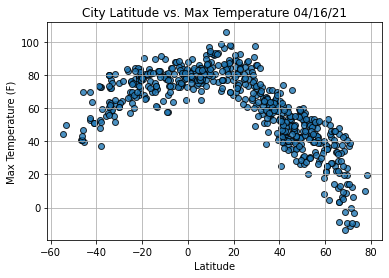

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

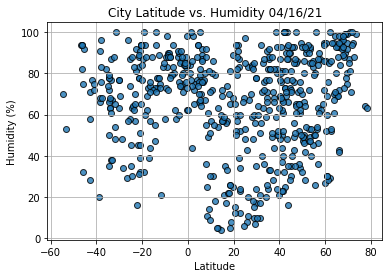

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

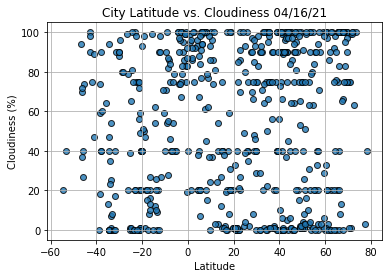

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

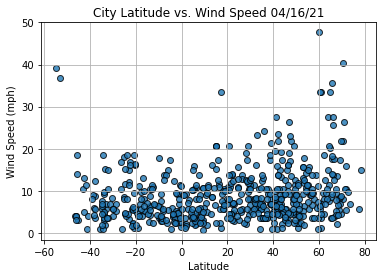

In [15]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Save figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data 
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_vales, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

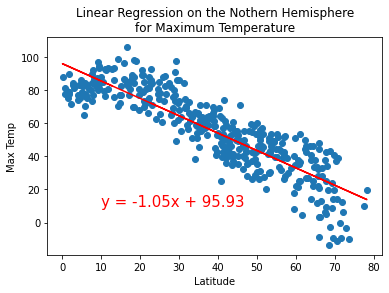

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Nothern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp', (10,10))

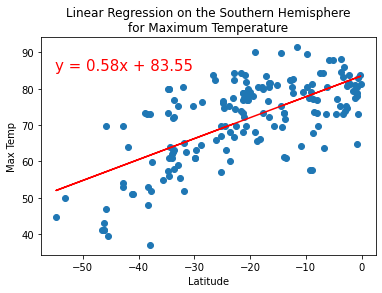

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp', (-55,85))

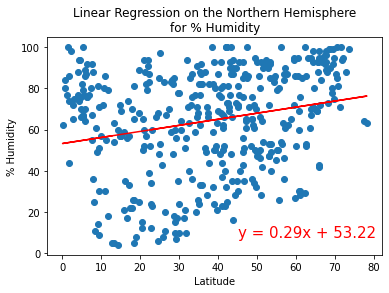

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
                       '% Humidity', (45,8))

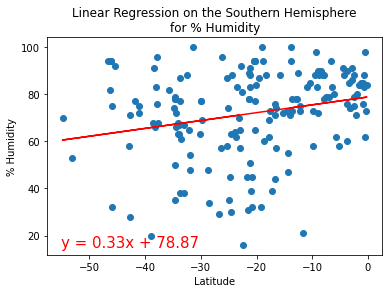

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere\nfor % Humidity', 
                       '% Humidity', (-55,15))

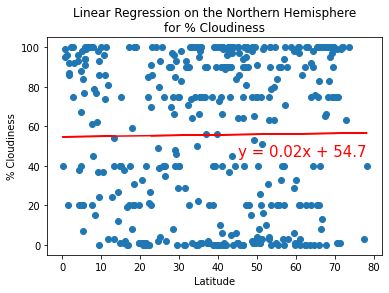

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness', (45,45))

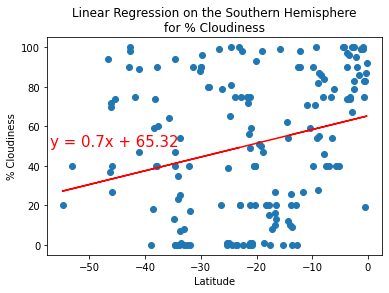

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness', (-57,50))

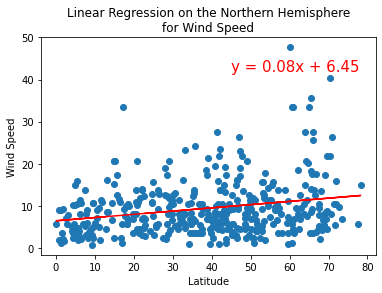

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 
                       'Wind Speed', (45,42))

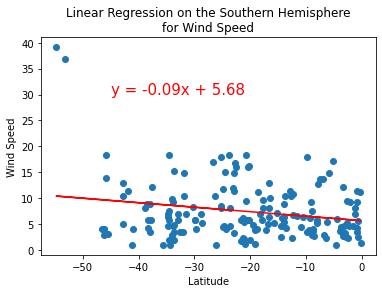

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 
                       'Wind Speed', (-45,30))